## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
from pathlib import Path
from glob import glob

## Load Data

In [ ]:
# fp = Path("/mnt/FLOGA/data/results/snunet/20240702072155/checkpoints/0/training_logs.txt")

In [3]:
def extract_train_loss(file_path, train_loss_pattern=re.compile(r"Average train loss per image:\s+([\d\.]+)")):
    # Regular expression pattern to match the train loss
    
    # Read the file
    with open(file_path, 'r') as file:
        content = file.read()
    
    # Find all matches
    train_losses = train_loss_pattern.findall(content)
    
    # Convert to float and return
    return [float(loss) for loss in train_losses]

# Example usage
# train_losses = extract_train_loss(fp)
# train_losses

In [4]:
def extract_f1_scores(file_path, f1_score_pattern = re.compile(r"F1-score:\s+([\d\.]+)")):
    # Regular expression pattern to match the F1-score
    
    
    # Read the file
    with open(file_path, 'r') as file:
        content = file.read()
    
    # Find all matches
    f1_scores = f1_score_pattern.findall(content)
    
    # Convert to float and return
    return [float(score) for score in f1_scores]

# Example usage
# f1_scores = extract_f1_scores(fp)
# f1_scores

## Plot Graph for training loss

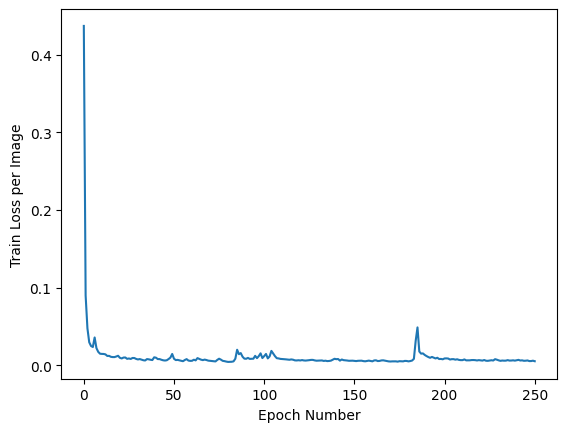

In [19]:
plt.plot(range(251), train_losses)
plt.xlabel("Epoch Number")
plt.ylabel("Train Loss per Image")
plt.savefig(Path(*fp.parts[:-1])/"train_loss.png")
plt.show()

## Plot Graph for F1 Score

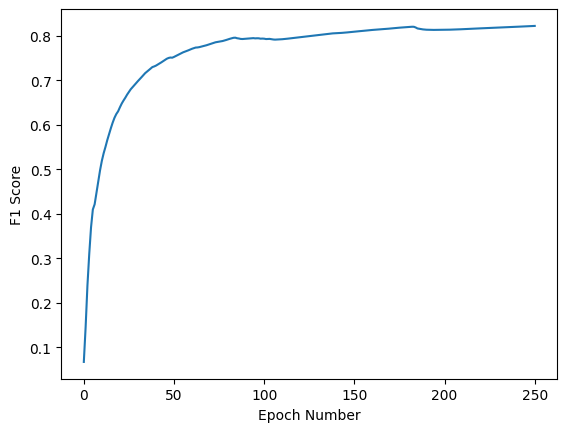

In [21]:
plt.plot(range(251), f1_scores)
plt.xlabel("Epoch Number")
plt.ylabel("F1 Score")
plt.savefig(Path(*fp.parts[:-1])/"f1_score.png")
plt.show()

## Save in Bulk

### For Training Logs

In [ ]:
file_paths = glob('/mnt/FLOGA/data/results/fc_ef_conc/2024*/**/training_logs.txt', recursive=True)
print(file_paths)
file_paths = [
    "/mnt/FLOGA/data/results/fc_ef_conc/20240715111739/checkpoints/0/training_logs.txt"
]

In [10]:
for fp in file_paths:
    fp = Path(fp)
    train_losses = extract_train_loss(fp)
    plt.plot(range(len(train_losses)), train_losses)
    plt.xlabel("Epoch Number")
    plt.ylabel("Train Loss per Image")
    plt.savefig(Path(*fp.parts[:-1])/"train_loss.png")
    plt.close()
    f1_scores = extract_f1_scores(fp)
    plt.plot(range((len(train_losses))), f1_scores)
    plt.xlabel("Epoch Number")
    plt.ylabel("F1 Score")
    plt.savefig(Path(*fp.parts[:-1])/"train_f1_score.png")
    plt.close()

### For Validation Logs

In [ ]:
file_paths = glob('/mnt/FLOGA/data/results/fc_ef_conc/2024*/**/validation_logs.txt', recursive=True)
print(file_paths)
file_paths = [
    "/mnt/FLOGA/data/results/fc_ef_conc/20240715111739/checkpoints/0/validation_logs.txt"
]

In [12]:
for fp in file_paths:
    fp = Path(fp)
    train_losses = extract_train_loss(fp, train_loss_pattern=re.compile(r"Average validation loss per image:\s+([\d\.]+)"))
    plt.plot(range(len(train_losses)), train_losses)
    plt.xlabel("Epoch Number")
    plt.ylabel("Validation Loss per Image")
    plt.savefig(Path(*fp.parts[:-1])/"validation_loss.png")
    plt.close()
    train_losses = extract_train_loss(fp, re.compile(r"Average accuracy loss:\s+([\d\.]+)"))
    plt.plot(range(len(train_losses)), train_losses)
    plt.xlabel("Epoch Number")
    plt.ylabel("Validation accuracy per Image")
    plt.savefig(Path(*fp.parts[:-1])/"validation_accuracy.png")
    plt.close()
    train_losses = extract_train_loss(fp, re.compile(r"Mean IoU:\s+([\d\.]+)"))
    plt.plot(range(len(train_losses)), train_losses)
    plt.xlabel("Epoch Number")
    plt.ylabel("Mean IoU")
    plt.savefig(Path(*fp.parts[:-1])/"validation_IoU.png")
    plt.close()
    f1_scores = extract_f1_scores(fp, re.compile(r"Average validation F1-score:\s+([\d\.]+)"))
    plt.plot(range(len(train_losses)), f1_scores)
    plt.xlabel("Epoch Number")
    plt.ylabel("F1 Score")
    plt.savefig(Path(*fp.parts[:-1])/"val_f1_score.png")
    plt.close()

## Compile Results

In [9]:
from glob import glob
import shutil

In [ ]:
files = glob('/mnt/FLOGA/data/results/changeformer/2024*/**/*.png', recursive=True)
print(type(files[0]))

<class 'str'>


In [ ]:
savdir = Path("/mnt/FLOGA/data/results/changeformer/visualizations/")
savdir.mkdir(parents=True, exist_ok=True)

In [24]:
for f in files:
    f = Path(f)
    uid = f.parts[-4]
    chckpt_no = f.parts[-2]
    fname = f.parts[-1]
    copy_path = savdir / uid / chckpt_no
    copy_path.mkdir(parents=True, exist_ok=True)
    copy_path = copy_path / fname
    shutil.copyfile(f, copy_path)

In [ ]:
dirs = glob('/mnt/FLOGA/data/results/**/visualizations/', recursive=True)
dirs

In [ ]:
for dir in dirs:
    dir = Path(dir)
    dest = Path(f'/mnt/FLOGA/data/visualizations/{dir.parts[-2]}/')
    dest.mkdir(parents=True, exist_ok=True)
    shutil.copytree(dir, dest, dirs_exist_ok=True)